predict whether the tweet is about disaster or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train.drop(['keyword','location'],axis=1,inplace=True)
train.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7613 non-null   int64 
 1   text    7613 non-null   object
 2   target  7613 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 178.6+ KB


In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
english_stopwords = stopwords.words('english')
english_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
vec = TfidfVectorizer()
X = vec.fit_transform(train['text'])
y = train['target']
x_test = vec.transform(test['text'])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
lr_model = LogisticRegression(random_state=22)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=22)

In [11]:
from sklearn.metrics import accuracy_score
y_pred = lr_model.predict(X_val)
acc = accuracy_score(y_val, y_pred)

print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 80.04%


In [12]:
from sklearn.svm import SVC
svm_model = SVC(random_state=22)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_val)
acc = accuracy_score(y_val, y_pred)

print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 81.16%


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [14]:
model = Sequential()

# now we can add layers to our model
model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))# input layer
model.add(Dropout(0.5)) #to avoid overfitting
model.add(Dense(256, activation='relu')) # hidden layer
model.add(Dropout(0.5))# to avoid overfitting
model.add(Dense(1, activation='sigmoid'))# output layer

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy']) # compile the model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               11078656  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 11,210,241
Trainable params: 11,210,241
Non-trainable params: 0
_________________________________________________________________


In [15]:
x_data = X_train.toarray() # convert sparse matrix to dense matrix 
y_data = y_train.to_numpy() # convert pandas series to numpy array for keras input 
print(x_data.shape)
print(y_data.shape)

history = model.fit(x_data, y_data, epochs=10, batch_size=32, validation_split=0.2)

(6090, 21637)
(6090,)
Epoch 1/10
153/153 [==============================] - 10s 63ms/step - loss: 0.6867 - accuracy: 0.5632 - val_loss: 0.6770 - val_accuracy: 0.5616
Epoch 2/10
153/153 [==============================] - 9s 58ms/step - loss: 0.6447 - accuracy: 0.6129 - val_loss: 0.6088 - val_accuracy: 0.6987
Epoch 3/10
153/153 [==============================] - 9s 58ms/step - loss: 0.4972 - accuracy: 0.8208 - val_loss: 0.4839 - val_accuracy: 0.7841
Epoch 4/10
153/153 [==============================] - 9s 60ms/step - loss: 0.3215 - accuracy: 0.8959 - val_loss: 0.4541 - val_accuracy: 0.7997
Epoch 5/10
153/153 [==============================] - 9s 59ms/step - loss: 0.2155 - accuracy: 0.9319 - val_loss: 0.4680 - val_accuracy: 0.7947
Epoch 6/10
153/153 [==============================] - 9s 58ms/step - loss: 0.1481 - accuracy: 0.9553 - val_loss: 0.4909 - val_accuracy: 0.7915
Epoch 7/10
153/153 [==============================] - 9s 58ms/step - loss: 0.1006 - accuracy: 0.9713 - val_loss: 0.5170

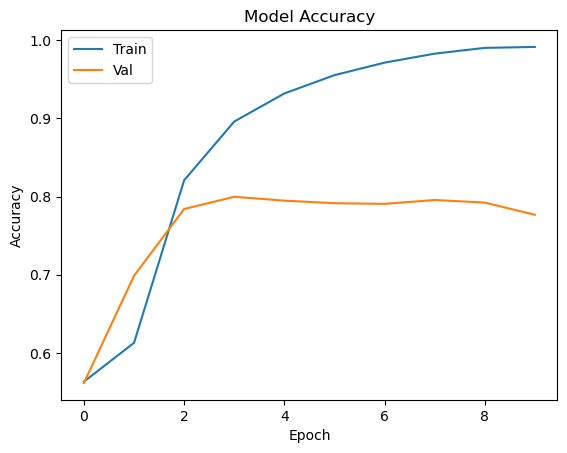

In [16]:
#ploting the accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [17]:
#submission
y_pred = model.predict(x_test.toarray())
y_pred = np.round(y_pred).astype(int).reshape(3263)
submission = pd.DataFrame({'id':test['id'],'target':y_pred})
submission.to_csv('submission.csv',index=False)

102/102 [==============================] - 2s 15ms/step


In [18]:
#save the model
model.save('model.h5')
#load the model
from keras.models import load_model
model = load_model('model.h5')


In [19]:
#predict the test data
y_pred = model.predict(x_test.toarray())
y_pred = np.round(y_pred).astype(int).reshape(3263)
submission = pd.DataFrame({'id':test['id'],'target':y_pred})
submission.to_csv('submission2.csv',index=False)

102/102 [==============================] - 2s 17ms/step
